In [1]:
import numpy as np, matplotlib.pyplot as plt
import simpleSVGD
import hmclab

%load_ext autoreload
%autoreload 2

In [2]:
dist = hmclab.Distributions.Himmelblau(temperature=40)

def grd(m):
    return -np.hstack([dist.gradient(m[idm,:,None]) for idm in range(m.shape[0])]).T


# def grd(m):
#     return - np.sign(m)

In [18]:
%matplotlib nbagg

initial_samples = np.random.normal(0, 4, [2000, 2])


final_samples = simpleSVGD.update(
    initial_samples, grd, n_iter=200, stepsize=0.1, alpha=0.9,
)

WHADDUP


100%|█████████████████████████████████████████| 200/200 [00:22<00:00,  8.99it/s]


<IPython.core.display.Javascript object>


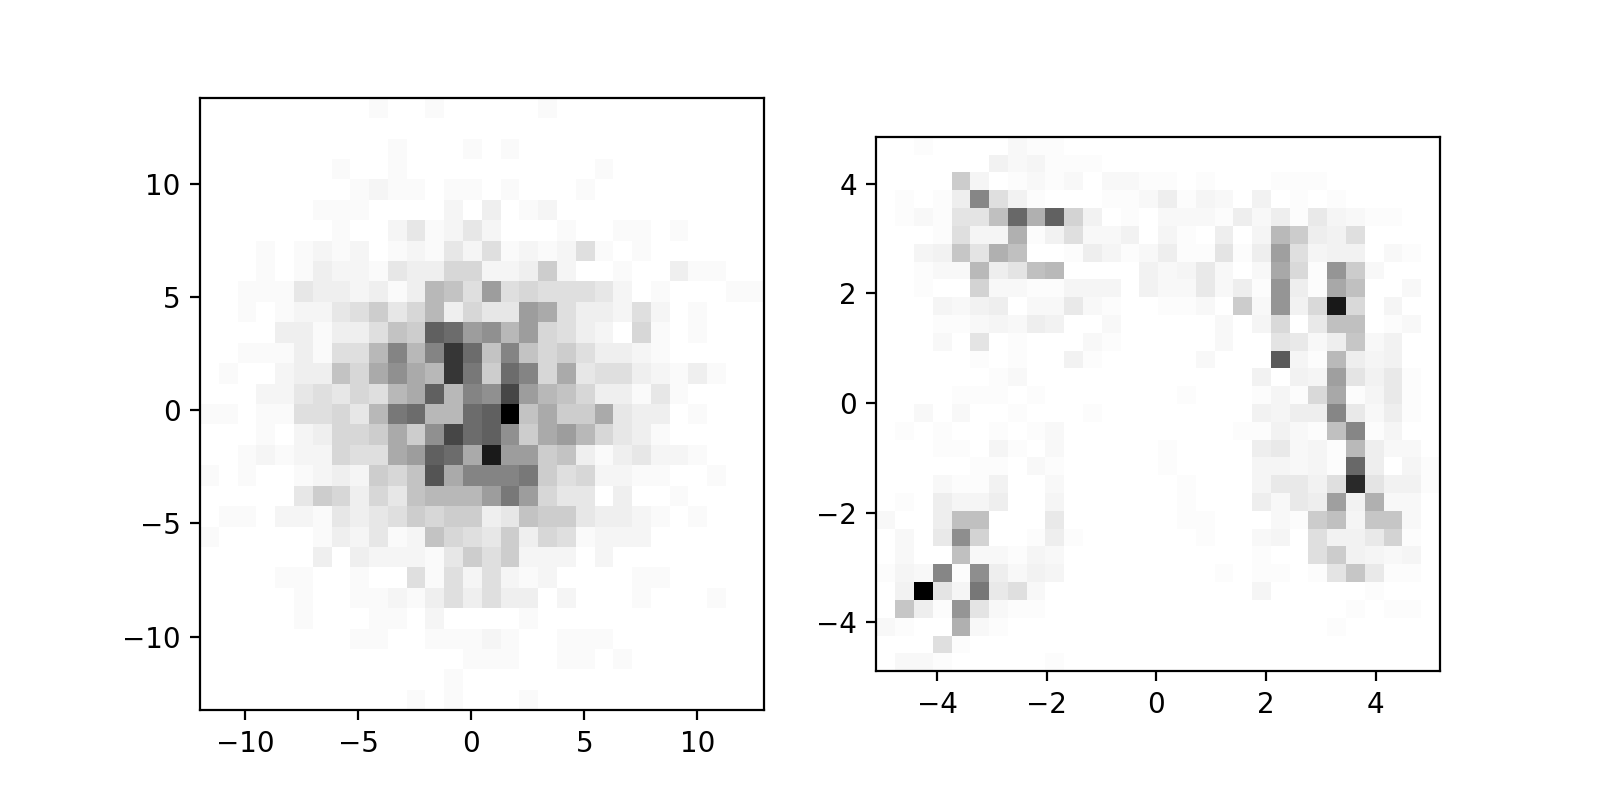

In [19]:
plt.figure(figsize=(8, 4))
plt.subplot(121)
_ = plt.hist2d(
    initial_samples[:, 0], initial_samples[:, 1], bins=30, cmap=plt.get_cmap("Greys")
)
plt.gca().set_aspect(1)
plt.subplot(122)
_ = plt.hist2d(
    final_samples[:, 0], final_samples[:, 1], bins=30, cmap=plt.get_cmap("Greys")
)
plt.gca().set_aspect(1)